In [4]:
pip install pyswarms

  Using cached pyswarms-1.3.0-py2.py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random 
from pathlib import Path
import pyswarms as ps

In [29]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# NUM_vehicles = 3
NUM_vehicles = data['ID'].nunique()
NUM_Fuel = 5
Min_cost = 500000
SWARM_SIZE = 30
NUM_ITER = 1000

# basepath Path(".")
data = pd.read_csv("data/fleet_data_2023.csv")
data.head()
# food data['Food"]
# cal lookup data[ 'Calories").values
# utility data['Utility').values -1

,Year,Size,Distance,Demand (km),ID,Vehicle,Year_y,Cost ($),Yearly range (km),Fuel,Consumption (unit_fuel/km),emissions (CO2/unit_fuel),Cost ($/unit_fuel),cost Uncertainty (±%),Carbon emission CO2/kg
0,2023,S1,D1,869181,BEV_S1_2023,BEV,2023,187000,102000,Electricity,0.893043,0.000000,0.191791,0,11677957
1,2023,S1,D4,414315,Diesel_S1_2023,Diesel,2023,85000,102000,B20,0.223016,3.048580,1.220845,0,11677957
2,2023,S1,D4,414315,Diesel_S1_2023,Diesel,2023,85000,102000,HVO,0.223016,0.487624,1.814314,0,11677957
3,2023,S1,D4,414315,LNG_S1_2023,LNG,2023,100000,102000,LNG,0.165507,2.486188,1.011618,0,11677957
4,2023,S1,D4,414315,LNG_S1_2023,LNG,2023,100000,102000,BioLNG,0.165159,0.378439,1.087817,0,11677957


In [5]:
fuel = data['Fuel']
vehicle = data['Vehicle']

cost_lookup = data['Cost ($)'].values


In [19]:
demand = data['Demand (km)'].values*-1

In [30]:
# def f_per_particle(m,Min_cost):
#     j = 0
#     if np.count_nonzero(m) != NUM_vehicles:
#         j += 5e4 
#     # j += utility[np.where(m==1)].sum()
#     cost_budget = cost_lookup[np.where(m==1)].sum()
#     if cost_budget > Min_cost:
#         j += cost_budget
#     return j

def f_per_particle(m, Min_cost):
    penalty = 0
    if np.count_nonzero(m) != NUM_vehicles:
        penalty += 1e3  # Reduced penalty
    cost_budget = cost_lookup[np.where(m == 1)].sum()
    if cost_budget > Min_cost:
        penalty += cost_budget - Min_cost  # Penalize exceeding the budget
    return penalty


In [31]:
def f(x,min_cost = Min_cost):
    n_particles =  x.shape[0]
    j = [f_per_particle(x[i],Min_cost) for i in range(n_particles)]  
    return np.array(j)

In [32]:
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=NUM_vehicles, options=options)
    
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)
    print(f'No. of vehicles selected: {pos.sum()}; '
          f'cost per year : {cost_lookup[np.where(pos==1)].sum()}; ')
    print( '\nMode1 Run times: ')
    return cost, pos, optimizer.cost_history

In [33]:
def plot_history(history):
    plt.style.use( 'ggplot')
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.labelright'] = True
    plt.rcParams['ytick.left'] = False
    plt.rcParams['ytick.labelleft'] = False
    plt.rcParams['font.family'] = 'Arial'
    
    plt.ylim([min(history) - 1000, max(history) + 500])
    plt.title('Cost History')
    plt.plot(history)

In [37]:
def plot_history(history):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    plt.plot(history, label='Cost')
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()


In [34]:
checkpoint_state = np.random.get_state()


In [39]:
%%time
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}
# options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 10, 'p': 2}
cost, pos, history = run_model(options)

2025-01-26 15:45:31,662 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/1000, best_cost=1e+3

pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=1e+3
2025-01-26 15:45:35,157 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1000.0, best pos: [0 0 0 0 1 0 0 1 1 1 0 0]


No. of vehicles selected: 4; cost per year : 470000; 

Mode1 Run times: 
CPU times: total: 1.66 s
Wall time: 3.51 s


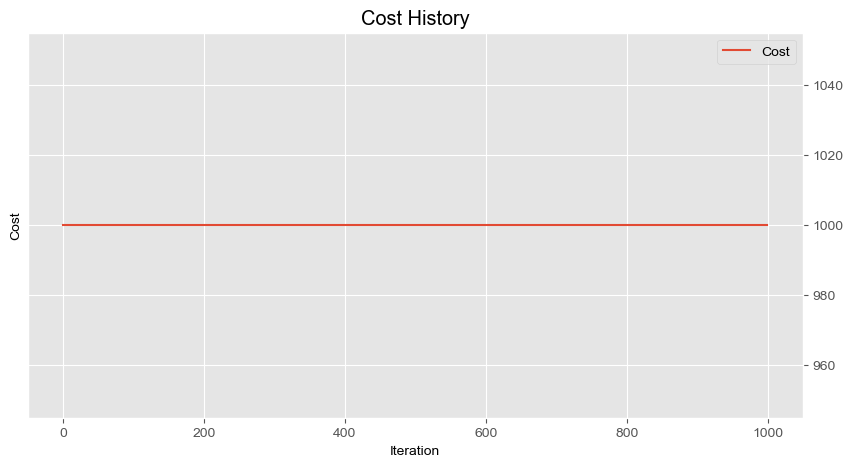

In [40]:
plot_history(history)

2025-01-26 15:49:15,695 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=2.7e+5
2025-01-26 15:49:18,135 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 270000.0, best pos: [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No. of vehicles selected: 3
Total cost: 270000
Selected vehicles (indices): [1 2 3]


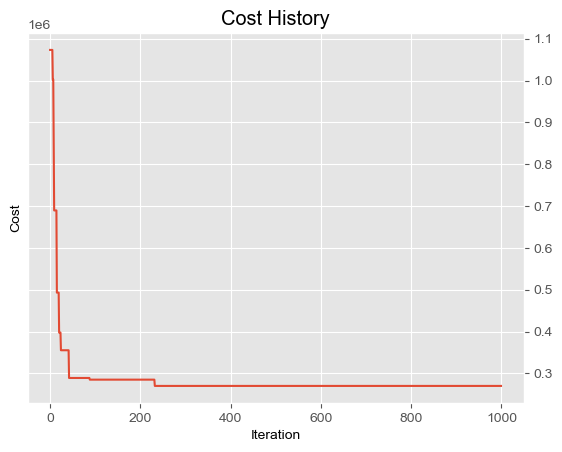

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pathlib import Path
import pyswarms as ps

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Parameters
NUM_vehicles = 3  # Number of vehicles to select
SWARM_SIZE = 30   # Number of particles in the swarm
NUM_ITER = 1000   # Number of iterations for optimization

# Load dataset
data = pd.read_csv("data/fleet_data_2023.csv")

# Extract relevant data from the dataset
cost_lookup = data['Cost ($)'].values  # Vehicle costs
demand = data['Demand (km)'].values * -1  # Demand (converted to negative for minimization)

# Ensure data integrity
assert len(cost_lookup) == len(demand), "Mismatch between cost and demand data."

# Fitness function for a single particle
def f_per_particle(m, penalty_factor=1e5):
    # Ensure only NUM_vehicles are selected
    penalty = penalty_factor * abs(np.count_nonzero(m) - NUM_vehicles)

    # Calculate total cost of selected vehicles
    total_cost = cost_lookup[np.where(m == 1)].sum()

    # Combine cost and penalty
    return total_cost + penalty

# Fitness function for the swarm
def f(x):
    n_particles = x.shape[0]
    return np.array([f_per_particle(x[i]) for i in range(n_particles)])

# Run optimization model
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=len(cost_lookup), options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)

    # Print results
    print(f'No. of vehicles selected: {np.count_nonzero(pos)}')
    print(f'Total cost: {cost_lookup[np.where(pos == 1)].sum()}')
    print(f'Selected vehicles (indices): {np.where(pos == 1)[0]}')
    return cost, pos, optimizer.cost_history

# Plot cost history
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history)
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Run optimization
checkpoint_state = np.random.get_state()
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}

cost, pos, history = run_model(options)

# Plot cost history
plot_history(history)


2025-01-26 15:52:40,772 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=1.17e+6
2025-01-26 15:52:43,117 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1170000.0, best pos: [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No. of vehicles selected: 4
Total cost: 370000
Selected vehicles (indices): [1 2 3 4]


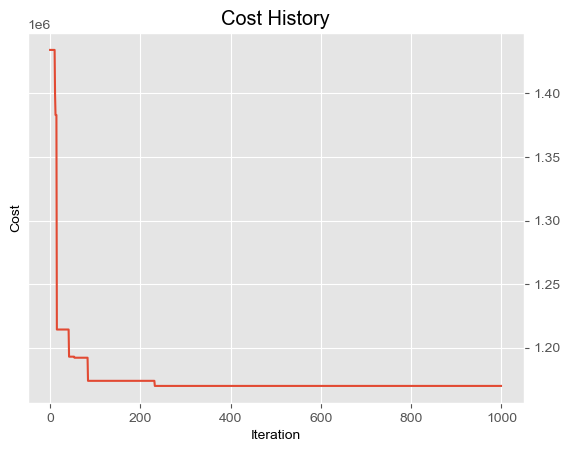

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pathlib import Path
import pyswarms as ps

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Parameters
NUM_vehicles = data['ID'].nunique() # Number of vehicles to select
SWARM_SIZE = 30   # Number of particles in the swarm
NUM_ITER = 1000   # Number of iterations for optimization

# Load dataset
data = pd.read_csv("data/fleet_data_2023.csv")

# Extract relevant data from the dataset
cost_lookup = data['Cost ($)'].values  # Vehicle costs
demand = data['Demand (km)'].values * -1  # Demand (converted to negative for minimization)

# Ensure data integrity
assert len(cost_lookup) == len(demand), "Mismatch between cost and demand data."

# Fitness function for a single particle
def f_per_particle(m, penalty_factor=1e5):
    # Ensure only NUM_vehicles are selected
    penalty = penalty_factor * abs(np.count_nonzero(m) - NUM_vehicles)

    # Calculate total cost of selected vehicles
    total_cost = cost_lookup[np.where(m == 1)].sum()

    # Combine cost and penalty
    return total_cost + penalty

# Fitness function for the swarm
def f(x):
    n_particles = x.shape[0]
    return np.array([f_per_particle(x[i]) for i in range(n_particles)])

# Run optimization model
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=len(cost_lookup), options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)

    # Print results
    print(f'No. of vehicles selected: {np.count_nonzero(pos)}')
    print(f'Total cost: {cost_lookup[np.where(pos == 1)].sum()}')
    print(f'Selected vehicles (indices): {np.where(pos == 1)[0]}')
    return cost, pos, optimizer.cost_history

# Plot cost history
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history)
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Run optimization
checkpoint_state = np.random.get_state()
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}

cost, pos, history = run_model(options)

# Plot cost history
plot_history(history)


In [43]:
# Function to save selected vehicles to a CSV file
def save_selected_vehicles_to_csv(cost_lookup, pos, filename="selected_vehicles.csv"):
    selected_indices = np.where(pos == 1)[0]
    selected_vehicles_cost = cost_lookup[selected_indices]
    
    # Create a DataFrame with selected vehicle indices and their corresponding costs
    selected_vehicles_df = pd.DataFrame({
        'Vehicle Index': selected_indices,
        'Cost ($)': selected_vehicles_cost
    })
    
    # Save to CSV
    selected_vehicles_df.to_csv(filename, index=False)
    print(f'Selected vehicles saved to {filename}')
    
# Save the selected vehicles after running the optimization
save_selected_vehicles_to_csv(cost_lookup, pos)


Selected vehicles saved to selected_vehicles.csv
